In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [38]:
def set_chinese():     #maplotlib中文支持函数
    from pylab import mpl
    mpl.rcParams['font.sans-serif']=['SimHei']
    mpl.rcParams['axes.unicode_minus']=False

set_chinese()

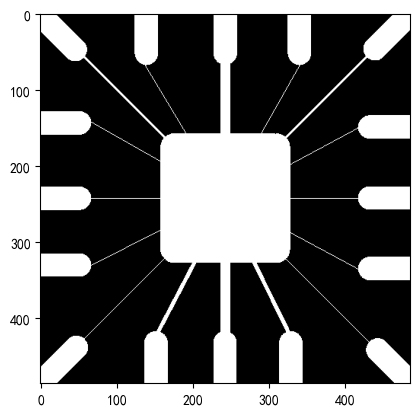

In [39]:
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\wirebond-mask.tif",0)
plt.imshow(img_ori,'gray')

(<Axes: title={'center': '3x3矩形核 腐蚀操作'}>,
 (-0.5, 485.5, 485.5, -0.5),
 Text(0.5, 1.0, '3x3矩形核 腐蚀操作'))

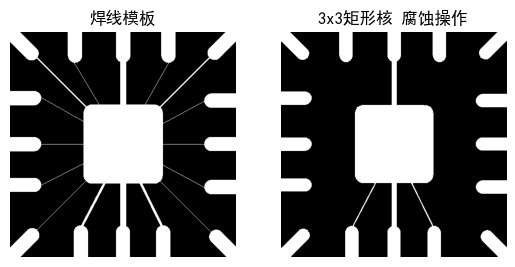

In [40]:
#腐蚀
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)) 
'''
形态学操作用于生成SE
getStructuringElement(shape,ksize)
shape：代表形状类型
    cv2. MORPH_RECT：矩形结构元素，所有元素值都是1
    cv2. MORPH_CROSS：十字形结构元素，对角线元素值都是1
    cv2. MORPH_ELLIPSE：椭圆形结构元素
ksize：代表形状元素的大小
'''
erode_img = cv2.erode(img_ori,kernel)

plt.subplot(121),plt.imshow(img_ori,'gray'),plt.axis('off'),plt.title('焊线模板')
plt.subplot(122),plt.imshow(erode_img,'gray'),plt.axis('off'),plt.title('3x3矩形核 腐蚀操作')

(<Axes: title={'center': '3x3矩形核 膨胀操作'}>,
 (-0.5, 1018.5, 888.5, -0.5),
 Text(0.5, 1.0, '3x3矩形核 膨胀操作'))

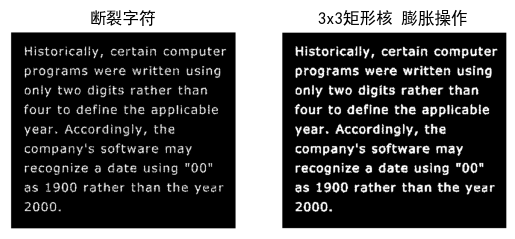

In [41]:
#膨胀
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\text-broken.tif",0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
dilate_img = cv2.dilate(img_ori,kernel)

plt.subplot(121),plt.imshow(img_ori,'gray'),plt.axis('off'),plt.title('断裂字符')
plt.subplot(122),plt.imshow(dilate_img,'gray'),plt.axis('off'),plt.title('3x3矩形核 膨胀操作')

In [42]:
'''开操作、闭操作'''
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PYL\DIP\imageset\fingerprint-noisy.tif",0)
#plt.imshow(img_ori,'gray')

(<Axes: title={'center': '闭操作'}>,
 (-0.5, 314.5, 237.5, -0.5),
 Text(0.5, 1.0, '闭操作'))

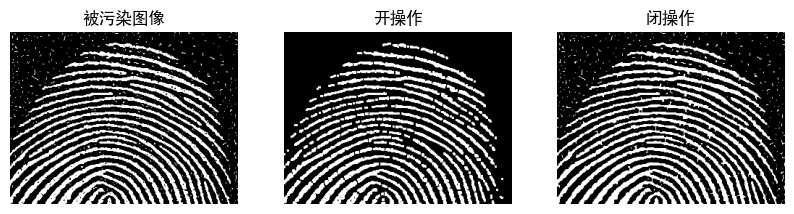

In [43]:
#开运算，先腐蚀后膨胀
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))   #采用3x3矩形核

erode_img = cv2.erode(img_ori,kernel)
result1 = cv2.dilate(erode_img,kernel)

#闭运算，先膨胀后腐蚀
dilate_img = cv2.dilate(img_ori,kernel)
result2 = cv2.erode(dilate_img,kernel)

plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(img_ori,'gray'),plt.axis('off'),plt.title('被污染图像')
plt.subplot(132),plt.imshow(result1,'gray'),plt.axis('off'),plt.title('开操作')
plt.subplot(133),plt.imshow(result2,'gray'),plt.axis('off'),plt.title('闭操作')